1. Load
1. Split train and test
1. Transform
1. Build Model
1. Train
1. Evaluate

In [1]:
#!pip install pandas
!pip install tensorflow

In [1]:
import pandas as pd
import numpy as np
import glob
from os import path as op
import os
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
bad_subjs = ["T060","C024","T031"]
location = glob.glob("/home/elekin/results/output/preproc/cbl/*/cbl_extracted_ts.csv")
files = list(filter(lambda x: not any(subj in x for subj in bad_subjs),location))
N = len(files)
shape = [N,158,28]
timeseries = np.empty(shape)
labels = np.empty(N)
print(N)
for i, f in enumerate (files):
    #print(i,f)
    df = pd.read_csv(f, header=None)
    #print(df.shape)
    timeseries[i] = df.values
    labels[i] = 1 if 'C' in f else 0

98


In [3]:
files[0],files[5]

('/home/elekin/results/output/preproc/cbl/C280/cbl_extracted_ts.csv',
 '/home/elekin/results/output/preproc/cbl/T021/cbl_extracted_ts.csv')

In [4]:
labels[0],labels[5]

(1.0, 0.0)

In [5]:
timeseries.shape

(98, 158, 28)

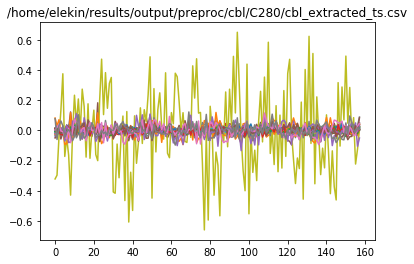

1.0


In [6]:
index=0
plt.title(files[index])
plt.plot(timeseries[index,:,:])
plt.show()
print(labels[index])

In [7]:
X_train=timeseries
X_train.shape

(98, 158, 28)

In [ ]:
import tensorflow as tf
from tf.keras.models import Sequential
from tf.keras.layers import Dense,Dropout
from tf.keras.utils import to_categorical